In [1]:
import numpy as np
import pandas as pd



In [35]:
# read data into DF 
df = pd.read_csv('laptops_new.csv')
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [36]:
# data preparation
df.columns = df.columns.str.lower().str.replace(' ','_')
df.columns


Index(['laptop', 'status', 'brand', 'model', 'cpu', 'ram', 'storage',
       'storage_type', 'gpu', 'screen', 'touch', 'final_price'],
      dtype='object')

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


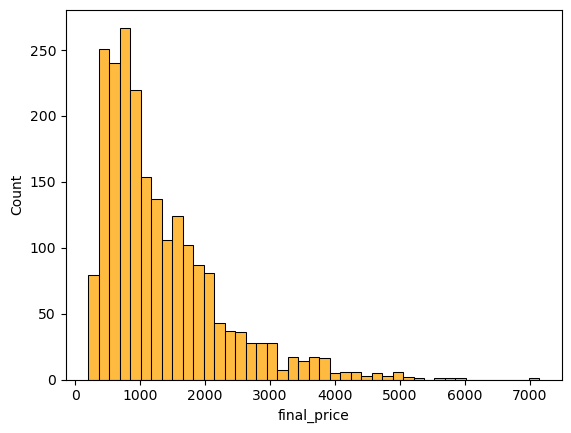

In [5]:
sns.histplot(df.final_price, color = 'orange')
plt.show()

In [38]:
# find out names of columns with missing values
df.columns[df.isnull().sum() > 0]

Index(['storage_type', 'gpu', 'screen'], dtype='object')

In [39]:
df.columns[df.isnull().any()]

Index(['storage_type', 'gpu', 'screen'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   laptop        2160 non-null   object 
 1   status        2160 non-null   object 
 2   brand         2160 non-null   object 
 3   model         2160 non-null   object 
 4   cpu           2160 non-null   object 
 5   ram           2160 non-null   int64  
 6   storage       2160 non-null   int64  
 7   storage_type  2118 non-null   object 
 8   gpu           789 non-null    object 
 9   screen        2156 non-null   float64
 10  touch         2160 non-null   object 
 11  final_price   2160 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 202.6+ KB


In [56]:
# Caclulate median of a column
df.ram.median()

16.0

In [55]:
df.ram.describe()

count    2160.000000
mean       15.413889
std         9.867815
min         4.000000
25%         8.000000
50%        16.000000
75%        16.000000
max       128.000000
Name: ram, dtype: float64

In [41]:
base = ['ram', 'storage','screen','final_price']
df[base]

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


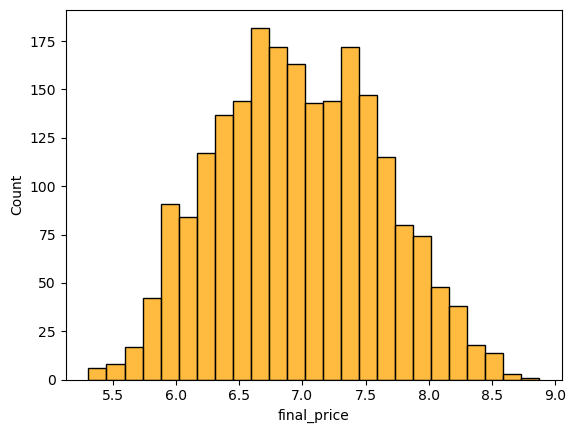

In [42]:
sns.histplot(np.log1p(df.final_price), color = 'orange')
plt.show()

In [43]:
total = len(df)

In [44]:
# Shuffle the data
idx = np.arange(total)

np.random.seed(42)
np.random.shuffle(idx)   # This shuffles the idx values
idx   

array([2079,  668, 2073, ..., 1130, 1294,  860])

In [15]:
df.iloc[idx[:10]] ## Once idx values are shuflled we use first N values from idx array to get rows from df in a rondom fashion

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
2079,MSI Modern 15 A11SBU-620XES Intel Core i7-1165...,Refurbished,MSI,Modern,Intel Core i7,32,1000,SSD,MX 450,15.6,No,1123.29
668,Thomson Neo White Intel Celeron N4020/4GB/64GB...,New,Thomson,Neo,Intel Celeron,4,64,eMMC,NaN,14.1,No,201.05
2073,MSI Modern 14 B11SB-420XES Intel Core i7-1165G...,Refurbished,MSI,Modern,Intel Core i7,32,1000,SSD,MX 450,14.0,No,997.74
1113,ASUS ZenBook 13 OLED UX325EA Intel Evo Core i7...,New,Asus,ZenBook,Intel Evo Core i7,16,512,SSD,NaN,13.3,No,1016.00
788,Acer Predator Triton 500 SE PT516-51s-75K6 Int...,New,Acer,Predator,Intel Core i7,32,1000,SSD,RTX 3080,16.0,No,2739.00
1780,Asus ROG G513QM-HF246 AMD Ryzen 7 5800H/16GB/1...,Refurbished,Asus,ROG,AMD Ryzen 7,16,1000,SSD,RTX 3060,15.6,No,1183.68
1672,Vant Edge Intel Core i7-10510U/16GB/500GB SSD/...,New,Vant,Edge,Intel Core i7,16,500,SSD,NaN,14.0,No,1123.00
1717,Acer Extensa 15 EX215-52-78J5 Intel Core i7-10...,Refurbished,Acer,Extensa,Intel Core i7,8,512,SSD,NaN,15.6,No,423.58
926,HP ZBook Studio G9 Intel Core i7-12700H/32GB/5...,New,HP,Zbook,Intel Core i7,32,512,SSD,RTX A1000,16.0,No,2866.16
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99


In [45]:
# 60, 20, 20 split 
n_train = int(total * 0.6)
n_val = int(total * 0.2)
n_test = int(total * 0.2)
n_train,n_val,n_test

(1296, 432, 432)

In [46]:
## we do the actual splitting of the data here.
df_train =  df[base].iloc[idx[:n_train]]
df_val = df[base].iloc[idx[n_train : n_train + n_val]]
df_test = df[base].iloc[idx[n_train + n_val :]]


In [47]:
## Reset the indexes
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

df_train

,ram,storage,screen,final_price
0,32,1000,15.6,1123.29
1,4,64,14.1,201.05
2,32,1000,14.0,997.74
3,16,512,13.3,1016.00
4,32,1000,16.0,2739.00
...,...,...,...,...
1291,8,256,14.0,549.00
1292,32,1000,16.0,1999.00
1293,16,512,15.6,1059.00
1294,16,512,14.0,1671.00


In [48]:
## gather the prices into different arrays as this is the value we want to predict. This will be use for supervised learning
## .values gives the array
y_train = df_train.final_price.values
y_val = df_val.final_price.values
y_test = df_test.final_price.values

y_train

array([1123.29,  201.05,  997.74, ..., 1059.  , 1671.  , 1056.  ])

In [49]:
## delete the target variable from input data
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [50]:
df_test

,ram,storage,screen
0,32,1000,15.6
1,16,512,13.0
2,16,512,15.6
3,16,512,15.0
4,16,1000,15.6
...,...,...,...
427,8,512,15.0
428,8,256,15.6
429,8,256,13.3
430,8,512,14.0


In [51]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
   
    X1 = np.column_stack([ones, X])
    XTX = X1.T.dot(X1)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X1.T).dot(y)

    return w_full[0], w_full[1:]
    

In [52]:
#df_train.isnull().sum()
X_train = df_train.fillna(0).values
X_train

array([[  32. , 1000. ,   15.6],
       [   4. ,   64. ,   14.1],
       [  32. , 1000. ,   14. ],
       ...,
       [  16. ,  512. ,   15.6],
       [  16. ,  512. ,   14. ],
       [  16. ,  512. ,   14. ]])

In [53]:
def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [54]:
W0, w = train_linear_regression(X_train, y_train)

X_val = df_val.fillna(0).values
y_pred = W0 + X_val.dot(w)

score = round(rmse(y_pred, y_val),2)  ## RMSE when missing values are filled with ZEROs is 0.42886353154744117
score

597.36

In [57]:
# Option 2, use the mean of screen 
df_train.isnull().sum()
screen_mean = df_train.screen.mean()
screen_mean

X_train = df_train.fillna(screen_mean)
X_train = X_train.values
X_train

array([[  32. , 1000. ,   15.6],
       [   4. ,   64. ,   14.1],
       [  32. , 1000. ,   14. ],
       ...,
       [  16. ,  512. ,   15.6],
       [  16. ,  512. ,   14. ],
       [  16. ,  512. ,   14. ]])

In [58]:
df_val.isnull().sum()

ram        0
storage    0
screen     1
dtype: int64

In [59]:
W0, w = train_linear_regression(X_train, y_train)

X_val = df_val.fillna(screen_mean).values
y_pred = W0 + X_val.dot(w)

score = round(rmse(y_pred, y_val),2)
score

600.27

In [ ]:
# For question 3, answer is option with 0 is good. 

In [61]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [62]:
df_train.isnull().sum()
X_train = df_train.fillna(0).values
X_train

array([[  32. , 1000. ,   15.6],
       [   4. ,   64. ,   14.1],
       [  32. , 1000. ,   14. ],
       ...,
       [  16. ,  512. ,   15.6],
       [  16. ,  512. ,   14. ],
       [  16. ,  512. ,   14. ]])

In [63]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    W0, w = train_linear_regression_reg(X_train, y_train, r)
    X_val = df_val.fillna(screen_mean).values
    y_pred = W0 + X_val.dot(w)
    
    score = round(rmse(y_pred, y_val),2)
    print(f' Value of r {r}, SCORE : {score}')

 Value of r 0, SCORE : 599.53
 Value of r 0.01, SCORE : 599.53
 Value of r 0.1, SCORE : 599.49
 Value of r 1, SCORE : 599.2
 Value of r 5, SCORE : 598.45
 Value of r 10, SCORE : 598.04
 Value of r 100, SCORE : 597.48


In [32]:
# Question 4 , answer is 100

In [64]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
seeds[1]

arr = np.zeros(len(seeds))
for s in seeds:
    arr[s] = seeds[s]

arr = np.zeros(len(seeds))
len(df)
df

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


In [65]:
rmse_values = np.zeros(len(seeds))
for s in seeds:
    total = len(df)
    n_train = int(total * 0.6)
    n_val = int(total * 0.2)
    n_test = int(total * 0.2)

    idx = np.arange(total)
    np.random.seed(s)
    np.random.shuffle(idx) 
    
    df_train =  df[base].iloc[idx[:n_train]]
    df_val = df[base].iloc[idx[n_train : n_train + n_val]]
    df_test = df[base].iloc[idx[n_train + n_val :]]
    
    df_train = df_train.reset_index(drop = True)
    df_val = df_val.reset_index(drop = True)
    df_test = df_test.reset_index(drop = True)
    
    y_train = df_train.final_price.values
    y_val = df_val.final_price.values
    y_test = df_test.final_price.values
    
    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']
    
    X_train = df_train.fillna(0).values
    
    W0, w = train_linear_regression(X_train, y_train)
    
    X_val = df_val.fillna(0).values
    
    y_pred = W0 + X_val.dot(w)
    
    rmse_values[s] = rmse(y_pred, y_val)

std = np.std(rmse_values)
final_val = round(std, 3)
print(f' STD OF {rmse_values} is {np.std(rmse_values)}')
print(f'Final Value : {final_val}')
print(np.expm1(std))



 STD OF [565.45208688 636.79854231 588.95586979 597.814892   571.96279151
 573.23832566 647.34383284 550.43981845 587.33350362 576.10179294] is 29.176491258292383
Final Value : 29.176
4690176159264.728


In [ ]:
# For question 5 answer is 29.176, second option is correct one.

In [71]:
total = len(df)
n_train = int(total * 0.6)
n_val = int(total * 0.2)
n_test = int(total * 0.2)

idx = np.arange(total)
np.random.seed(9)
np.random.shuffle(idx) 

df_train =  df[base].iloc[idx[:n_train]]
df_val = df[base].iloc[idx[n_train : n_train + n_val]]
df_test = df[base].iloc[idx[n_train + n_val :]]

df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

y_train = df_train.final_price.values
y_val = df_val.final_price.values
y_test = df_test.final_price.values

del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

df_train_full = pd.concat([df_train, df_val])
y_train_full = np.concatenate([y_train, y_val])

X_train_full = df_train_full.fillna(0).values

W0, w = train_linear_regression_reg(X_train_full, y_train_full, 0.001)

X_test = df_test.fillna(0).values

y_pred = W0 + X_test.dot(w)

score = round(rmse(y_test, y_pred),2)
score

608.61